<a href="https://colab.research.google.com/github/Yuan-Hao-Hsieh/Regression/blob/main/Colabdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **載入套件**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, RidgeCV

# 匯入資料集

In [4]:
boston = pd.read_csv('/content/drive/MyDrive/boston_data/HousingData.csv')

# **處理缺失值**
- 直接刪除有遺失值的列
- 分割數據集為訓練資料跟測試資料
- 訓練資料占比0.8 測試資料占比0.2
- random_state暫定為42
- 標準化訓練資料集

In [5]:

boston = boston.dropna()
boston = pd.get_dummies(boston)
X = boston.drop('MEDV', axis=1)  # 特徵變量
y = boston['MEDV']  # 目標變量（房價）
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


(315, 13)
(79, 13)
(315,)
(79,)


##多元線性回歸模型
- 用多元線性回歸模型訓練資料
- 印出各項參數及截距項
- 用mse評估模型效能

In [6]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
w_0 = linear_model.intercept_
w_1 = linear_model.coef_
print('Interception : ', w_0)
print('Coeficient : ', w_1)
mse_train = mean_squared_error(y_train, linear_model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, linear_model.predict(X_test_scaled))
print(f'Mean Squared Error in training data: {mse_train}')
print(f'Mean Squared Error in testing data: {mse_test}')

Interception :  21.993333333333336
Coeficient :  [-1.09299765  0.97431655  0.17589472  0.51612013 -1.98125482  2.99665496
 -0.61026711 -2.94464351  2.06984891 -2.07443678 -2.0915885   0.89475279
 -2.94995322]
Mean Squared Error in training data: 16.69221271088402
Mean Squared Error in testing data: 31.45404766495087


## 用Cross validation 找出最好的 $\lambda$
- 使用的程式碼為

```
alphas = np.logspace(-6, 6, 1000)
ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)
```
- 印出最好的alpha($\lambda$ in the slides)



In [21]:
alphas = np.logspace(-6, 6, 1000)
ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_model.fit(X_train_scaled, y_train)
best_alpha = ridge_model.alpha_
print(f"best alpha : {best_alpha}")

best alpha : 6.2921461096103375


## Ridge regression 模型
- 印出各項參數及截距項
- 用mse評估模型效能

In [8]:
# ridge regression 模型
Ridge_model = Ridge(alpha=best_alpha)
Ridge_model.fit(X_train_scaled, y_train)
w_0 = Ridge_model.intercept_
w_1 =Ridge_model.coef_
print('Interception : ', w_0)
print('Coeficient : ', w_1)
# 用mse評估模型效能
mse_train = mean_squared_error(y_train, Ridge_model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, Ridge_model.predict(X_test_scaled))
print(f'Mean Squared Error in training data: {mse_train}')
print(f'Mean Squared Error in testing data: {mse_test}')

Interception :  21.993333333333336
Coeficient :  [-1.01946812  0.85873871 -0.03440278  0.54652675 -1.72556288  3.0213439
 -0.59175395 -2.66016124  1.55570998 -1.58466604 -2.03323029  0.88113802
 -2.88795447]
Mean Squared Error in training data: 16.75554122121838
Mean Squared Error in testing data: 31.953198605269215


## **對比模型**
- 用標準化後的資料進行預測
- 比對的指標包含mse及$R^2$

In [9]:
# 預測
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = Ridge_model.predict(X_test_scaled)

# 計算均方誤差
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
score_linear = r2_score(y_test, y_pred_linear)
score_ridge = r2_score(y_test, y_pred_ridge)

# 輸出結果
print(f"The MSE of linear regression: {mse_linear}")
print(f"The MSE of ridge regression: {mse_ridge}")
print(f"The score of linear regression (R^2): {score_linear}")
print(f"The score of ridge regression  (R^2): {score_ridge}")
print(f"best alpha: {best_alpha}")
# 對比模型
if mse_linear < mse_ridge:
    print("The MSE of linear regression is lower than ridge regression")
else:
    print("The MSE of ridge regression is lower than linear regression")

The MSE of linear regression: 31.45404766495087
The MSE of ridge regression: 31.953198605269215
The score of linear regression (R^2): 0.6270849941673191
The score of ridge regression  (R^2): 0.6211671270043079
best alpha: 6.2921461096103375
The MSE of linear regression is lower than ridge regression


# **多項式回歸模型**
- 先導入多項式回歸所需之套件
```
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
```
- 建構四次方(OLS)linear regression的模型
- 印出MSE判斷模型好壞



In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
regressor = make_pipeline(PolynomialFeatures(4), LinearRegression())
regressor.fit(X_train_scaled, y_train)
mse_train = mean_squared_error(y_train, regressor.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, regressor.predict(X_test_scaled))
print(f'Mean Squared Error in training data: {mse_train}')
print(f'Mean Squared Error in testing data: {mse_test}')

Mean Squared Error in training data: 6.807158134650433e-26
Mean Squared Error in testing data: 441.62471251096395



由上述結果，可以看出有嚴重overfitting的情況
* train data 的 MSE 非常小。
* testing data 的 MSE 非常大。







因此導入ridge regression 模型並印出mse。
- 重新做一次ridgecv 找出最好的hyperparameters。





In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# Define the range of alphas to test
alphas = np.logspace(-6, 6, 1000)
regressor = make_pipeline(PolynomialFeatures(4), RidgeCV(alphas=alphas, store_cv_values=True))

# Fit the model
regressor.fit(X_train_scaled, y_train)

# Predict and calculate the Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, regressor.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, regressor.predict(X_test_scaled))

# Output the results
print(f'Mean Squared Error in training data: {mse_train}')
print(f'Mean Squared Error in testing data: {mse_test}')
print(f'Best alpha chosen by RidgeCV: {regressor.named_steps["ridgecv"].alpha_}')


Mean Squared Error in training data: 2.219064121802429
Mean Squared Error in testing data: 29.749492976219358
Best alpha chosen by RidgeCV: 147.28827239075048


# Ridge trace plot
- 此資料集中，共有315個樣本及13個features。
- 映出每個feature 的名稱
- alphas is $10^{-6} ∼ 10^{6} $
- we can observe $\hat{β}$ the coefficients for these features either shrink towards zero or stabilize.

(315, 13)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


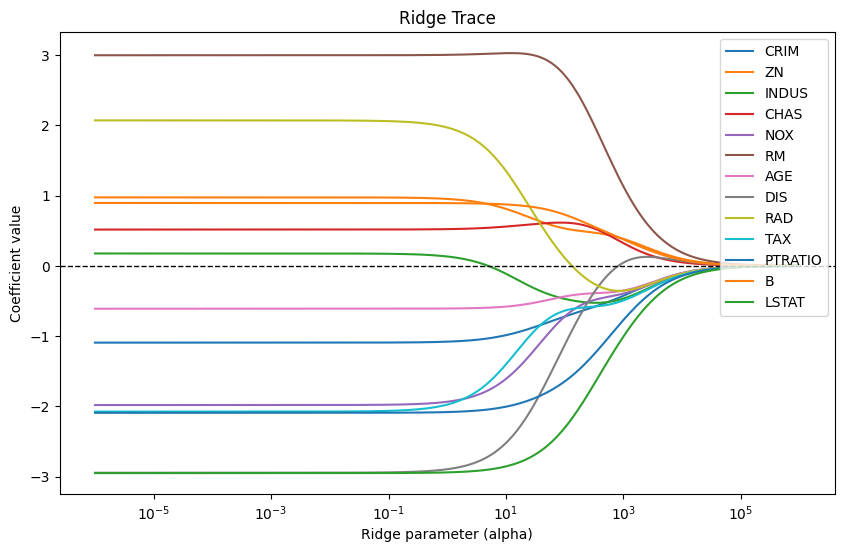

In [12]:
print(X_train_scaled.shape)
print(X.columns)
# List of ridge parameters
alphas = np.logspace(-6, 6, 200)

# Initialize Ridge regression model
ridge_coefs = []

# Fit the model for different values of the ridge parameter
for alpha in alphas:
    ridge = Ridge(alpha=alpha, fit_intercept=False)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge.coef_)

# Convert to numpy array for easier handling
ridge_coefs = np.array(ridge_coefs)
# Extract the feature names from the DataFrame
feature_names = X.columns
# Plot the Ridge Trace
plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):
    plt.plot(alphas, ridge_coefs[:, i], label=feature_names[i])
plt.xscale('log')
plt.xlabel('Ridge parameter (alpha)')
plt.ylabel('Coefficient value')
plt.title('Ridge Trace')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend(loc='upper right')
plt.show()

# Variance and biased traded-off
- 根據boston house 先找出正確的參數

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Fit the model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Calculate residuals
residuals = y_train - linear_model.predict(X_train_scaled)

# Calculate sigma_squared (Variance of the error term)
n, p = X_train_scaled.shape
sigma_squared = np.sum(residuals**2) / (n - p - 1)

# Retrieve the coefficients
beta = linear_model.coef_

# Calculate X'X
XtX = np.dot(X_train_scaled.T, X_train_scaled)

# Calculate the eigenvalues of X'X
lambda_values = np.linalg.eigvals(XtX)

print(f"Sigma Squared (Variance of the error term): {sigma_squared}")
print(f"Coefficients (Beta): {beta}")
print(f"Eigenvalues of X'X: {lambda_values}")


Sigma Squared (Variance of the error term): 17.468594697436764
Coefficients (Beta): [-1.09299765  0.97431655  0.17589472  0.51612013 -1.98125482  2.99665496
 -0.61026711 -2.94464351  2.06984891 -2.07443678 -2.0915885   0.89475279
 -2.94995322]
Eigenvalues of X'X: [1932.02286603  444.23591688  400.93472311  273.62085165  245.7392564
  212.86876263  176.69861984  120.59212767   19.60154319   89.47498134
   67.97995998   53.21455052   58.01584076]


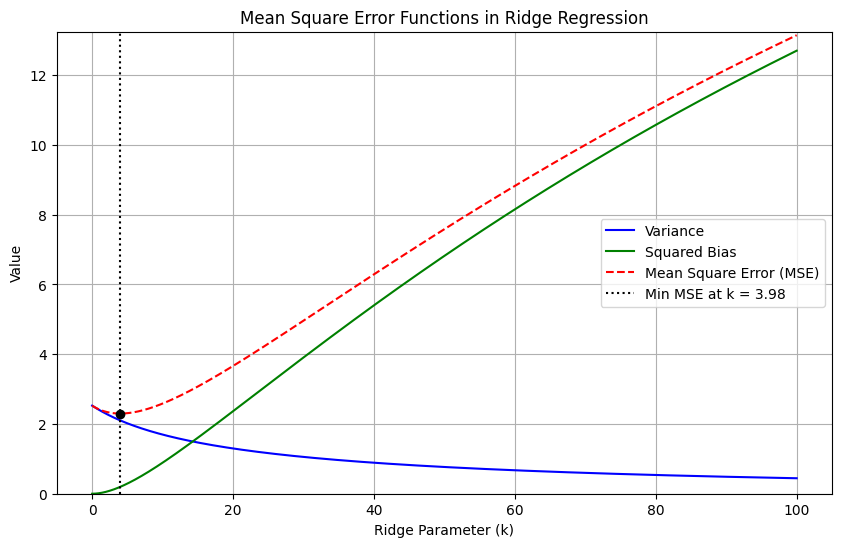

In [20]:
# Generate a range of k values
k_values = np.linspace(0,100,10000)

# Calculate Variance, Squared Bias, and MSE for each k
variance = np.array([sigma_squared * np.sum(lambda_values / (lambda_values + k)**2) for k in k_values])
squared_bias = np.array([np.sum((k**2 * beta**2) / (lambda_values + k)**2) for k in k_values])
mse = variance + squared_bias

# Find the minimum MSE and the corresponding k value
min_mse_index = np.argmin(mse)
min_mse_k = k_values[min_mse_index]
min_mse_value = mse[min_mse_index]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, variance, label="Variance", color='blue')
plt.plot(k_values, squared_bias, label="Squared Bias", color='green')
plt.plot(k_values, mse, label="Mean Square Error (MSE)", color='red', linestyle='--')
plt.axvline(x=min_mse_k, color='black', linestyle=':', label=f"Min MSE at k = {min_mse_k:.2f}")
plt.scatter(min_mse_k, min_mse_value, color='black', zorder=5)  # Highlight the minimum MSE point

# Add labels and title
plt.xlabel("Ridge Parameter (k)")
plt.ylabel("Value")
plt.title("Mean Square Error Functions in Ridge Regression")
plt.legend()
plt.grid(True)
plt.ylim(0, max(mse) + 0.1)  # Proper scaling for better visualization
plt.show()